In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine=pd.merge(mouse_metadata,study_results,how="outer",on='Mouse ID')
combine.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
regimen=combine.groupby("Drug Regimen")
new_times=regimen["Tumor Volume (mm3)"].count()
new_mean=regimen["Tumor Volume (mm3)"].mean()
new_median=regimen["Tumor Volume (mm3)"].median()
new_var=regimen["Tumor Volume (mm3)"].var()
new_sd=regimen["Tumor Volume (mm3)"].std()
new_sem=regimen["Tumor Volume (mm3)"].sem()
summary_table=pd.DataFrame({
                "Trials":new_times,
                "Mean":new_mean,
                "Median":new_median,
                "Variance":new_var,
                "Standard Deviation":new_sd,
                "Standard Error of the Mean":new_sem
})
summary_table

,Trials,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:

promising_regimens_c = combine.loc[combine['Drug Regimen']=="Capomulin"]
tumor_c=promising_regimens_c["Tumor Volume (mm3)"]
promising_regimens_r = combine.loc[combine['Drug Regimen']=="Ramicane"]
tumor_r=promising_regimens_r["Tumor Volume (mm3)"]
promising_regimens_i = combine.loc[combine['Drug Regimen']=="Infubinol"]
tumor_i=promising_regimens_i["Tumor Volume (mm3)"]
promising_regimens_ce = combine.loc[combine['Drug Regimen']=="Ceftamin"]
tumor_ce=promising_regimens_ce["Tumor Volume (mm3)"]
tumor_c

10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64

In [4]:
promising_regimens_c = combine.loc[combine['Drug Regimen']=="Capomulin"]
promising_regimens_c.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [5]:
av_tumor=promising_regimens_c.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_we=promising_regimens_c.groupby('Mouse ID')['Weight (g)'].unique()


Text(0, 0.5, 'Mouse Weight')

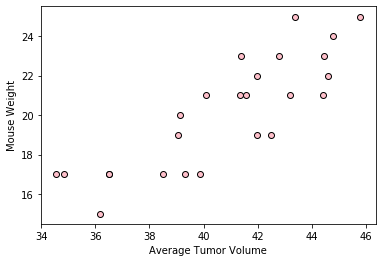

In [17]:
fig, ax = plt.subplots() 
av_tumor=promising_regimens_c.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_we=promising_regimens_c.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(av_tumor,mouse_we,marker="o", facecolors="pink", edgecolors="black")
plt.title('')
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")


In [8]:
from scipy.stats import linregress
correlation = st.pearsonr(av_tumor,mouse_we)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


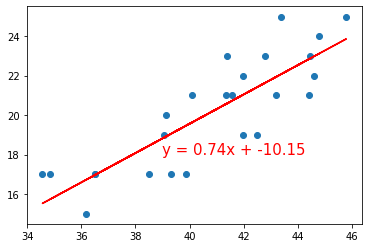

In [34]:
fig, ax = plt.subplots() 
(slope, intercept, rvalue, pvalue, stderr) = linregress(av_tumor, mouse_we)
regress_values = av_tumor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(av_tumor,mouse_we)
plt.plot(av_tumor,regress_values,color="red")
ax.annotate(line_eq,(39,18),fontsize=15,color="red")
plt.show()



In [11]:
 
line_eq

'y = 0.74x + -10.15'